**SWMM: modifying the input file**
<br>Uses input files from tutorial included in SWMM5 download.
<br>https://pyswmm.readthedocs.io/en/stable/tutorial/index.html

*Packages needed:*
<br>swmmtoolbox
<br>pyswmm

*Local modules needed:*
<br>genplot
<br>SWMMinput

*Files needed:*
<br> swmm5.dll
<br> vcomp120.dll
<br> tutorial1.inp
<br> precip.dat

**Notes:**
<br> - use pandas dataframes instead of lists & dics, and to_string instead str.format()
<br> - does order of nodes in coordinate section matter?
<br> - to add: iterate to create many new input files w/ dif geom from single initial input file
<br> - to add: update conduits when new nodes are added
<br> - to add: tools to change the subcatchments?

In [1]:
# Import packages & modules:
import pyswmm as ps
from swmmtoolbox import swmmtoolbox as tb
from matplotlib import pyplot as plt
import os
import sys
from genplot import prettyplot
import SWMMinput as si

In [2]:
# Set up directories & filenames:
modelname = 'tutorial1_test'                                 #model name
path = r'C:\Users\Chloe\Documents\PYTHON\GOTTESACKER\SWMM'   #path to model files

inputfile = modelname + '.inp'                               #name of input file

In [3]:
# Modify input file:

# Read in input file:
inputfile_lines = si.read_infile(inputfile)

# Import junction information from input file & create junction objects:
section = 'JUNCTIONS'                 #assign string that indicates the beginning of the desired section
[jdic,jkeys] = si.read_section(inputfile_lines, section)  #read desired section of SWMM input file
J = si.batch_create(jkeys,jdic,si.Junction)     #create junction objects from dictionary info
print('Original junctions:',[J[i].Name for i in range(len(J))])
    
# Create new junctions and update input file:
newkeys = ['J5','J6']                                   #create list of new junction key strings
newdic = {'J5':[87.,4.,0.,0.,0.],'J6':[86.,4.,0.,0.,0.]}#create dictionary for new junction

J = si.add_objects(J,si.Junction,newkeys,newdic)        #create new junction objects
print('New junctions:', [J[i].Name for i in range(len(J))])
#si.update_infile_junctions('new_input.inp',inputfile_lines,J)   #update input file
si.update_infile('new_input.inp','JUNCTIONS',inputfile_lines,J)

# Change parameter values for existing junctions and update input file:
print('J1 elev.:',J[0].Name,J[0].Elevation)            #print current elevation
J[0].setElev(97.0)                                     #set new elevation
print('New J1 elev.:',J[0].Name,J[0].Elevation)        #print new elevation
#si.update_infile_junctions('new_input.inp',inputfile_lines,J)   #update input file
si.update_infile('new_input.inp','JUNCTIONS',inputfile_lines,J)

# Import coordinate information & create objects:
section = 'COORDINATES'                 #assign string that indicates the beginning of the desired section
[xydic,xykeys] = si.read_section(inputfile_lines, section)  #read desired section of SWMM input file
XY = si.batch_create(xykeys,xydic,si.Coordinate)     #create coordinate objects from dictionary info
print('Coordinates:',[XY[i].Name for i in range(len(XY))])

# Add node coordinates & update input file:
newdic = {'J5':[3500.0,3381.5],'J6':[1500.0,3400.0]}    #create dictionary for new coordinates
XY = si.add_objects(XY,si.Coordinate,newkeys,newdic)      #create new coordinate objects
print('New coordinates:',[XY[i].Name for i in range(len(XY))])
si.update_infile('new_input.inp','COORDINATES',inputfile_lines,XY) #update input file

# Import conduit information & create objects:
section = 'CONDUITS'            #assign string that indicates the beginning of the desired section
[cdic,ckeys] = si.read_section(inputfile_lines, section)  #read desired section of SWMM input file
C = si.batch_create(ckeys,cdic,si.Conduit)     #create coordinate objects from dictionary info
print('Conduits:',[C[i].Name for i in range(len(C))])

Original junctions: ['J1', 'J2', 'J3', 'J4']
New junctions: ['J1', 'J2', 'J3', 'J4', 'J5', 'J6']
J1 elev.: J1 96.0
New J1 elev.: J1 97.0
Coordinates: ['J1', 'J2', 'J3', 'J4', 'Out1']
New coordinates: ['J1', 'J2', 'J3', 'J4', 'Out1', 'J5', 'J6']
Conduits: ['C1', 'C2', 'C3', 'C4']


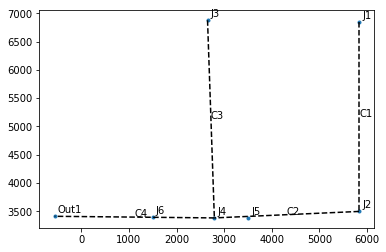

In [4]:
# Plot diagram of conduits:
si.plot_conduits(XY,C,xydic,True)


In [5]:
sys.exit()

SystemExit: 

C:\Users\Chloe\Anaconda3_32bit\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# Run SWMM & collect outflow data:
Qout = []                                   #create empty list to store outputs
t = []                                      #create empty list to store timesteps
with ps.Simulation(inputfile) as sim:       #open the model input file (with statement automatically closes itself when done)
    nodes = ps.Nodes(sim)                   #create node object with all nodes
    J4 = nodes['J4']                        #create node object for a specific node
    for step in sim:                        #loop over timesteps
        pass                                #placeholder to use when an indented block is required, but no actions need to happen yet
        Qout.append(J4.total_outflow)     #append outflow at node at current step
        t.append(sim.current_time)          #append current timestep
print('Model run complete.')                #print when model is done running

In [ ]:
# Plots:
prettyplot(t,Qout,'Node outflow','time','Q (cfs)')   #plot using prettyplot function